This is a data analysis project for the
wilks formula which is used for measuring ones strength
(typically used in powerlifting)
which is supposedly unbiased for the lifters weight, weight lifted
and sexe.

Here we will analyse and compare the wilks formula pre2020 and post2020

Coefficient constants are found at: 
https://en.wikipedia.org/wiki/Wilks_coefficient#:~:text=The%20Wilks%20coefficient%20or%20Wilks,the%20author%20of%20the%20formula.

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib widget

In [74]:
MALE = "male"
FEMALE = "female"
N = 20
L_BW = 40
H_BW = 190
MIN_W = 20
MAX_W = 600

body_weight = np.linspace(L_BW, H_BW, N)
weight_lifted = np.linspace(MIN_W, MAX_W, N)

In [75]:
"""
Wilks coefficient pre2020

accepts: 
-array of bodyweights
-sexe

Coefficients depends on what sexe the lifter is

returns an array of the coefficients
"""
def coeff_pre(body_weight: list[float], sexe: str) -> list[float]:
    INVALID = 0
    if(sexe == "male"):
        A = -216.0475144
        B = 16.2606339
        C = -0.002388645
        D = -0.00113732
        E = 7.01863e-6
        F = -1.291e-8
        CONST = 500
        return CONST/(A + B*body_weight + C*body_weight**2 + D*body_weight**3 + E*body_weight**4 + F*body_weight**5)

    elif(sexe == "female"):
        A = 594.31747775582
        B = -27.23842536447
        C = 0.82112226871
        D = -0.00930733913
        E = 4.731582e-5
        F = -9.054e-8
        CONST = 500
        return CONST/(A + B*body_weight + C*body_weight**2 + D*body_weight**3 + E*body_weight**4 + F*body_weight**5)

    else:
        print("Invalid sexe")
        return INVALID

"""
Wilks coefficient post2020

accepts: 
-array of bodyweights
-sexe

Coefficients depends on what sexe the lifter is

returns an array of the coefficients
"""

def coeff_post(body_weight: list[float], sexe: str) -> list[float]:
    INVALID = 0
    if(sexe == "male"):
        A = 47.46178854
        B = 8.472061379
        C = 0.07369410346
        D = -0.001395833811
        E = 7.07665973070743e-6
        F = -1.20804336482315e-8
        CONST = 600
        return CONST/(A + B*body_weight + C*body_weight**2 + D*body_weight**3 + E*body_weight**4 + F*body_weight**5)

    elif(sexe == "female"):
        A = -125.4255398
        B = 13.71219419
        C = -0.03307250631
        D = -0.001050400051
        E = 9.38773881462799e-6
        F = -2.3334613884954e-8
        CONST = 600
        return CONST/(A + B*body_weight + C*body_weight**2 + D*body_weight**3 + E*body_weight**4 + F*body_weight**5)

    else:
        print("Invalid sexe")
        return INVALID


def wilks(coeff: float, weight_lifted: float) -> float:
    return coeff*weight_lifted

In [76]:
X, Y = np.meshgrid(body_weight, weight_lifted)

wilks_pre_male = wilks(coeff_pre(X, MALE), Y)
wilks_post_male = wilks(coeff_post(X, MALE), Y)

Text(0.5, 0, 'wilks_points')

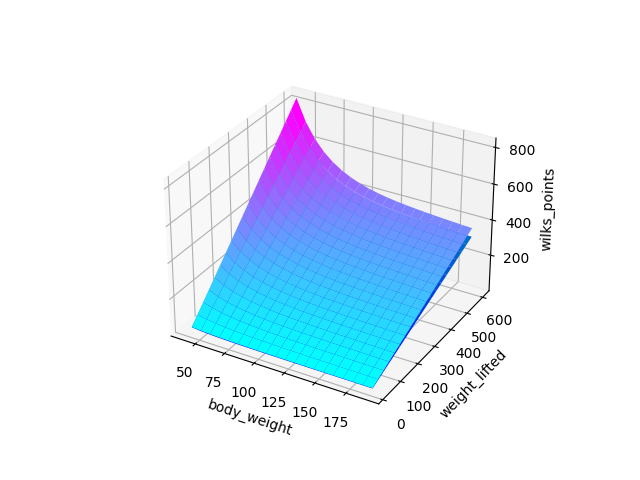

In [77]:
fig = plt.figure()
ax = plt.axes(projection='3d')
surf1 = ax.plot_surface(X, Y, wilks_pre_male, cmap='winter')
surf2 = ax.plot_surface(X, Y, wilks_post_male, cmap='cool')
ax.set_xlabel('body_weight')
ax.set_ylabel('weight_lifted')
ax.set_zlabel('wilks_points')


In [78]:
X, Y = np.meshgrid(body_weight, weight_lifted)
wilks_pre_female = wilks(coeff_pre(X, FEMALE), Y)
wilks_post_female = wilks(coeff_post(X, FEMALE), Y)

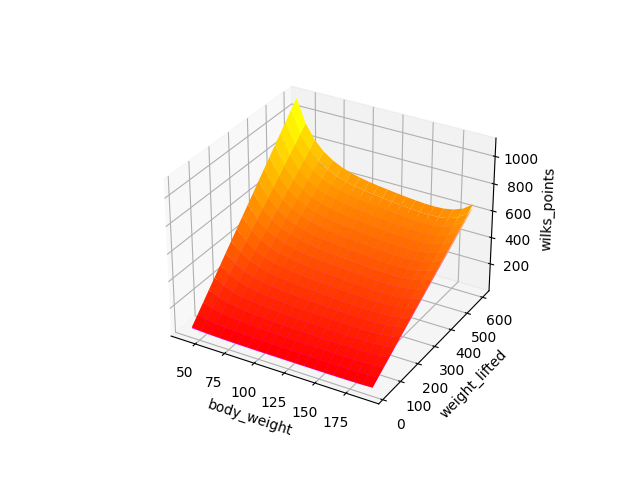

In [79]:
fig = plt.figure()
ax = plt.axes(projection='3d')
surf1 = ax.plot_surface(X, Y, wilks_pre_female, cmap='spring')
surf2 = ax.plot_surface(X, Y, wilks_post_female, cmap='autumn')
ax.set_xlabel('body_weight')
ax.set_ylabel('weight_lifted')
ax.set_zlabel('wilks_points')
plt.show()

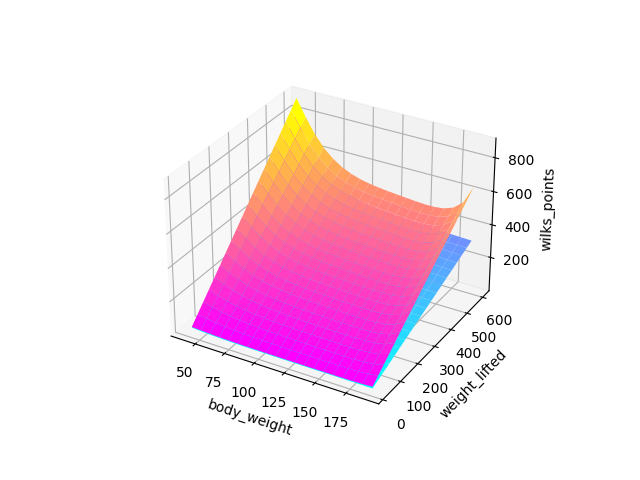

In [80]:
fig = plt.figure()
ax = plt.axes(projection='3d')
surf1 = ax.plot_surface(X, Y, wilks_pre_male, cmap='cool')
surf2 = ax.plot_surface(X, Y, wilks_pre_female, cmap='spring')
ax.set_xlabel('body_weight')
ax.set_ylabel('weight_lifted')
ax.set_zlabel('wilks_points')
plt.show()

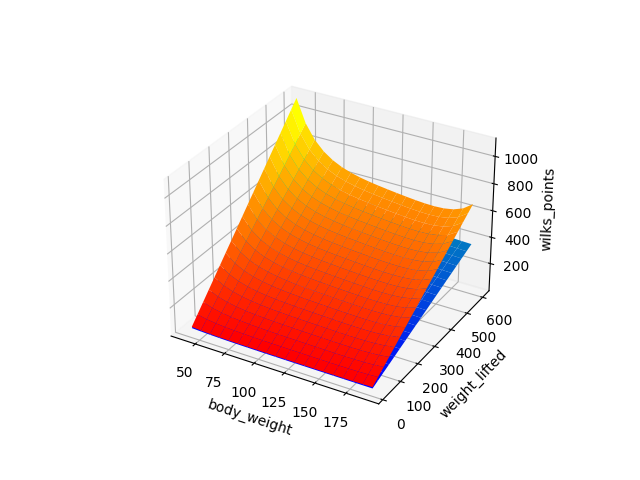

In [81]:
fig = plt.figure()
ax = plt.axes(projection='3d')
surf1 = ax.plot_surface(X, Y, wilks_post_male, cmap='winter')
surf2 = ax.plot_surface(X, Y, wilks_post_female, cmap='autumn')
ax.set_xlabel('body_weight')
ax.set_ylabel('weight_lifted')
ax.set_zlabel('wilks_points')
plt.show()